# Data Understanding & Preprocessing

## Install Libraries

In [13]:
!pip install tensorflow

## Import Important Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

## Load Dataset and do the preprocessing

In [15]:
df = pd.read_csv("/content/healthcare_readmission_dataset.csv")
df.head()

,patient_id,age,bmi,systolic_bp,diastolic_bp,heart_rate,glucose_level,num_previous_admissions,length_of_stay,chronic_condition,smoker,insurance_type,medication_count,followup_appointment,readmitted_30_days
0,PAT00001,69,31.9,127.0,76.0,85.0,115.0,3,3,cardiac,yes,public,5,no,1
1,PAT00002,32,16.5,102.0,70.0,84.0,133.0,1,8,diabetes,no,private,4,no,1
2,PAT00003,89,32.8,158.0,83.0,77.0,95.0,2,12,respiratory,no,self-pay,7,yes,1
3,PAT00004,78,33.9,105.0,82.0,86.0,151.0,0,17,diabetes,no,private,1,no,1
4,PAT00005,38,25.5,120.0,101.0,81.0,108.0,1,14,none,yes,private,10,yes,0


In [16]:
df.shape

(5000, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               5000 non-null   object 
 1   age                      5000 non-null   int64  
 2   bmi                      5000 non-null   float64
 3   systolic_bp              5000 non-null   float64
 4   diastolic_bp             5000 non-null   float64
 5   heart_rate               5000 non-null   float64
 6   glucose_level            5000 non-null   float64
 7   num_previous_admissions  5000 non-null   int64  
 8   length_of_stay           5000 non-null   int64  
 9   chronic_condition        5000 non-null   object 
 10  smoker                   5000 non-null   object 
 11  insurance_type           5000 non-null   object 
 12  medication_count         5000 non-null   int64  
 13  followup_appointment     5000 non-null   object 
 14  readmitted_30_days      

In [18]:
df.isna().sum()

,0
patient_id,0
age,0
bmi,0
systolic_bp,0
diastolic_bp,0
heart_rate,0
glucose_level,0
num_previous_admissions,0
length_of_stay,0
chronic_condition,0


#### There are zero null values. No need to do imputation.

In [19]:
df.duplicated().sum()

np.int64(0)

#### There are zero duplicate values. No need to drop values.

In [20]:
df.describe()

,age,bmi,systolic_bp,diastolic_bp,heart_rate,glucose_level,num_previous_admissions,length_of_stay,medication_count,readmitted_30_days
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,53.299000,26.898060,125.051000,80.270000,77.930600,110.316600,1.187200,10.583600,6.918600,0.460800
std,20.646851,5.055306,14.612526,10.087073,10.021051,28.260844,1.099453,5.787721,4.332728,0.498511
min,18.000000,15.000000,90.000000,50.000000,45.000000,60.000000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,23.400000,115.000000,73.000000,71.000000,89.000000,0.000000,6.000000,3.000000,0.000000
50%,53.000000,26.900000,125.000000,80.000000,78.000000,110.000000,1.000000,11.000000,7.000000,0.000000
75%,71.000000,30.400000,135.000000,87.000000,85.000000,130.000000,2.000000,16.000000,11.000000,1.000000
max,89.000000,44.600000,176.000000,120.000000,117.000000,206.000000,8.000000,20.000000,14.000000,1.000000


In [21]:
df.drop(columns=["patient_id"], inplace=True)

In [22]:
df["readmitted_30_days"].value_counts()

,count
readmitted_30_days,
0,2696
1,2304


#### Here we can see a little bit of unbalance in the data.

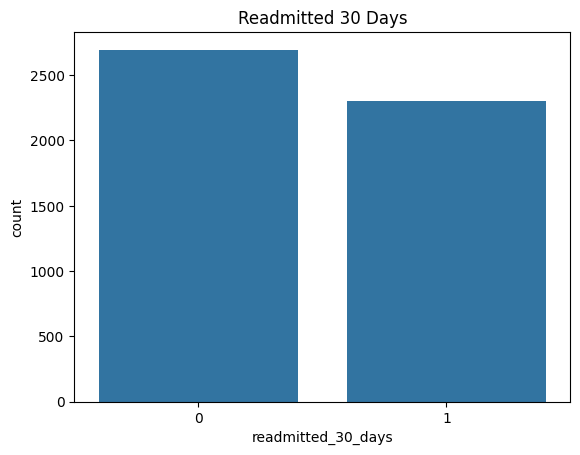

In [23]:
sns.countplot(x=df["readmitted_30_days"])
plt.title("Readmitted 30 Days")
plt.show()

#### Here by LabelEncoding we can convert the categorical column into numerical values

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = ["chronic_condition","smoker","insurance_type","followup_appointment"]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,age,bmi,systolic_bp,diastolic_bp,heart_rate,glucose_level,num_previous_admissions,length_of_stay,chronic_condition,smoker,insurance_type,medication_count,followup_appointment,readmitted_30_days
0,69,31.9,127.0,76.0,85.0,115.0,3,3,0,1,1,5,0,1
1,32,16.5,102.0,70.0,84.0,133.0,1,8,1,0,0,4,0,1
2,89,32.8,158.0,83.0,77.0,95.0,2,12,4,0,2,7,1,1
3,78,33.9,105.0,82.0,86.0,151.0,0,17,1,0,0,1,0,1
4,38,25.5,120.0,101.0,81.0,108.0,1,14,3,1,0,10,1,0


### Correlation Matrix

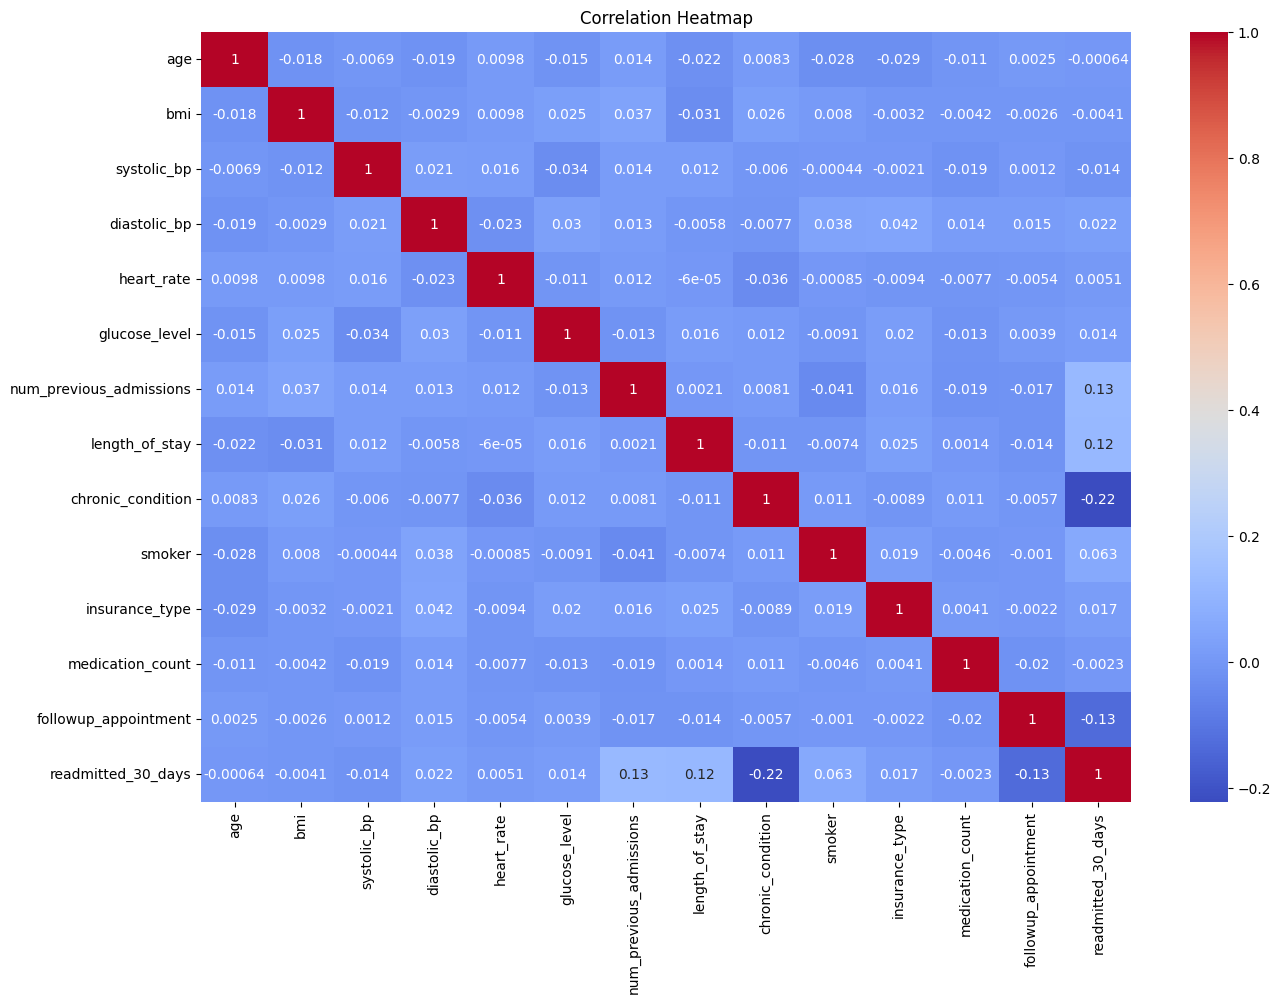

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = np.array([0.6, 0.2])
W1 = np.array([[0.4, -0.3],[0.1,0.2]])
b1 = np.array([0.1,0.1])
z1 = np.dot(X,W1)+b1
a1 = np.maximum(0,z1)

W2 = np.array([0.2,0.5])
b2 = 0.1
z2 = np.dot(a1,W2)+b2
y_hat = 1/(1+np.exp(-z2))
print(y_hat)

0.542894303348631


In [30]:
X = df.drop(columns=["readmitted_30_days"])
Y = df["readmitted_30_days"]

print("shape of x:- ", X.shape)
print("shape of y:- ", Y.shape)

shape of x:-  (5000, 13)
shape of y:-  (5000,)


# Train Test Split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [32]:
from imblearn.over_sampling import SMOTE

# data balancing by SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE: ", X_train.shape)
print("Shape of y_train after SMOTE: ", y_train.shape)

Shape of X_train after SMOTE:  (4314, 13)
Shape of y_train after SMOTE:  (4314,)


In [34]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Transforming the data into 0 to 1 scale.

## Build the ANN model

In [35]:
ann = Sequential()
ann.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
ann.add(Dense(64, activation="relu"))
ann.add(Dense(32, activation="relu"))
ann.add(Dense(16, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))

ann.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
ann.compile( optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
ann.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5710 - loss: 0.6714
Epoch 2/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 0.6184
Epoch 3/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5982
Epoch 4/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.5944
Epoch 5/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.5989
Epoch 6/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5738
Epoch 7/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5632
Epoch 8/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7089 - loss: 0.5561
Epoch 9/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5372
Epoch 10/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.5239
Epoch 11/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.5077
Epoch 12/120
135/135 ━━━━━━━━━━━━━━━━━━━━

In [38]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

print("test loss:- ", test_loss)
print("test accuracy:- ", test_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5584 - loss: 7.1719
test loss:-  6.862597465515137
test accuracy:-  0.5619999766349792


#### Adding Dropout layer for tuning the model.

In [39]:
ann_1 = Sequential()
ann_1.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
ann_1.add(Dropout(0.3))
ann_1.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
ann_1.add(Dropout(0.3))
ann_1.add(Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
ann_1.add(Dropout(0.3))
ann_1.add(Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
ann_1.add(Dropout(0.3))
ann_1.add(Dense(1, activation="sigmoid"))

ann_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
ann_1.compile( optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [41]:
ann_1.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5162 - loss: 0.8672
Epoch 2/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5989 - loss: 0.8099
Epoch 3/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.7690
Epoch 4/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6349 - loss: 0.7505
Epoch 5/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.7408
Epoch 6/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6507 - loss: 0.7207
Epoch 7/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6626 - loss: 0.6983
Epoch 8/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6511 - loss: 0.6875
Epoch 9/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6644 - loss: 0.6811
Epoch 10/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6668 - loss: 0.6714
Epoch 11/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6688 - loss: 0.6703
Epoch 12/120
135/135 ━━━━━━━━━━━━━━━━━━━━

In [42]:
test_loss, test_accuracy = ann_1.evaluate(X_test, y_test)

print("test loss:- ", test_loss)
print("test accuracy:- ", test_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5888 - loss: 0.7514
test loss:-  0.7545871734619141
test accuracy:-  0.6010000109672546


#### Ading early stopping

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [44]:
ann_1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
ann_1.fit(X_train, y_train, batch_size=32, epochs=120, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7310 - loss: 0.5842 - val_accuracy: 0.5950 - val_loss: 0.7567
Epoch 2/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7379 - loss: 0.5816 - val_accuracy: 0.6070 - val_loss: 0.7554
Epoch 3/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7284 - loss: 0.5781 - val_accuracy: 0.6000 - val_loss: 0.7531
Epoch 4/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7323 - loss: 0.5807 - val_accuracy: 0.5960 - val_loss: 0.7634
Epoch 5/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7388 - loss: 0.5799 - val_accuracy: 0.5920 - val_loss: 0.7569
Epoch 6/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7390 - loss: 0.5639 - val_accuracy: 0.6050 - val_loss: 0.7581
Epoch 7/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7443 - loss: 0.5809 - val_accuracy: 0.5860 - val_loss: 0.7698
Epoch 8/120
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7410 - loss: 0.5750 - val_accu

In [46]:
test_loss, test_accuracy = ann_1.evaluate(X_test, y_test)

print("test loss:- ", test_loss)
print("test accuracy:- ", test_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5967 - loss: 0.7450
test loss:-  0.7530732154846191
test accuracy:-  0.597000002861023


# Summary And Key Insights

1. Data Loading and Initial Exploration:

* The healthcare_readmission_dataset.csv dataset
was successfully loaded into a pandas DataFrame.
* Insight: Initial data inspection revealed no missing values or duplicate entries, indicating a clean dataset for immediate use.
* Descriptive statistics provided a quick overview of numerical features, like age, BMI, blood pressure, heart rate, and glucose levels, showing their distributions and ranges.

2. Data Preprocessing and Feature Engineering:

* The patient_id column was dropped as it's an identifier and not relevant for model training.
* Insight: The target variable, readmitted_30_days, showed a slight imbalance (approximately 54% '0' and 46% '1'), which was visualized with a countplot.
* Categorical features (chronic_condition, smoker, insurance_type, followup_appointment) were successfully converted to numerical representations using Label Encoding. This was a necessary step for the ANN model.
* A correlation heatmap was generated, allowing for visual identification of relationships between features and the target variable.

3. Data Splitting and Scaling:

* The dataset was split into training and testing sets (80% train, 20% test) ensuring stratification to maintain the original class distribution in both sets.
* Insight: To address the class imbalance identified earlier, the SMOTE technique was applied to the training data. This created a balanced training set, which is crucial for preventing the model from being biased towards the majority class.
* Features were scaled using StandardScaler.
Insight: This step is vital for neural networks, as it ensures that no single feature dominates the learning process due to its scale, leading to faster convergence and better performance.

4. Artificial Neural Network (ANN) Model Development:

* Initial Model (ann): A sequential ANN model was constructed with four dense hidden layers and a sigmoid output layer. This initial model served as a baseline.

* Insight: While the initial model showed very high training accuracy (often reaching 100%), its test accuracy was significantly lower (around 56%). This indicated a clear sign of overfitting – the model had learned the training data too well but failed to generalize to unseen data.

* Improved Model (ann_1) with Regularization and Early Stopping:

* To combat overfitting, L2 regularization was added to each Dense layer, and Dropout layers were introduced after each hidden layer. Insight: L2 regularization penalizes large weights, discouraging complex models, while Dropout randomly sets a fraction of input units to 0 during training, preventing co-adaptation of neurons and improving generalization.
* Early Stopping was implemented to monitor validation loss and stop training if no improvement was observed for a specified number of epochs (patience=15). Insight: Early stopping is a powerful technique to prevent overfitting by stopping the training when the model's performance on a validation set starts to degrade, thus finding the optimal epoch to save the model's weights.

5. Model Evaluation:

* The ann_1 model, trained with regularization and early stopping, achieved an improved test accuracy (around 60%) compared to the initial model (around 56%), along with a test loss of approximately 0.75.
* Overall Insight: The application of L2 regularization, Dropout layers, and Early Stopping was effective in mitigating overfitting, resulting in a model that generalizes better to unseen data. While the accuracy improved, further hyperparameter tuning and exploring more complex architectures or different regularization strengths could potentially lead to even better performance for predicting healthcare readmissions.